# Feature Selector Fire resistance

## Library loading, settings and dataset load

Hide warnings

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Main libraries load

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Additional libraries

In [3]:
from feature_selector import FeatureSelector as feat_selec
from autofeatselect import FeatureSelector
from autofeatselect import AutoFeatureSelect

In [4]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

Load Fire Resistance dataset after EDA

In [5]:
path = '/Users/manolo/Documents/Docencia/Tesis Doctorales/Elena Albeira Guirado Lucinio/Resistencia fuego/Datasets/'

In [6]:
df = pd.read_excel(path + 'FR_EDA.xlsx')

In [7]:
df.head()

,Thickness,t180,Gypsum,Lomas ash,Vermiculite,Fiberglass,PP Fiber,Fireproof cardboard,Carbonated ash,Rice husk ash,...,Coarse silica arid,Recycled demolition sand,Coarse demolition recycled arid,Coal slag,Bagasse ash,Coal Fly Ash,Silica gravel,Slag,Zeolitized ash,Silica fume
0,2.0,35.0,100.0,0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,2.0,15.7,30.0,60,9.5,0.5,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,1.5,26.0,99.5,0,0.0,0.0,0.5,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,1.5,15.7,30.0,60,9.5,0.5,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,1.3,20.2,99.5,0,0.0,0.0,0.5,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


## Features and target split

In [8]:
cat_feat = []
bin_feat = ['Fireproof cardboard']
target = 't180'
exclude = cat_feat + bin_feat + [target]
num_feat = [col for col in df.columns if col not in exclude]

In [9]:
df_fs = df.drop(columns = target)
df_target = df[target]

In [10]:
print("Original dataframe size",df.shape)
print("Datafrane size without FS target", df_fs.shape)
print("FS target", df_target.shape)

Original dataframe size (30, 27)
Datafrane size without FS target (30, 26)
FS target (30,)


Reset index

In [11]:
df_fs.reset_index(drop = True, inplace = True)
df_target.reset_index(drop = True, inplace = True)

In [12]:
fs = feat_selec(data = df_fs , labels = df_target)

Checking missing values

In [13]:
fs.identify_missing(missing_threshold=0)

0 features with greater than 0.00 missing values.



Features with a single unique value?

In [14]:
fs.identify_single_unique()

0 features with a single unique value.



In [15]:
single_unique = fs.ops['single_unique']
single_unique

[]

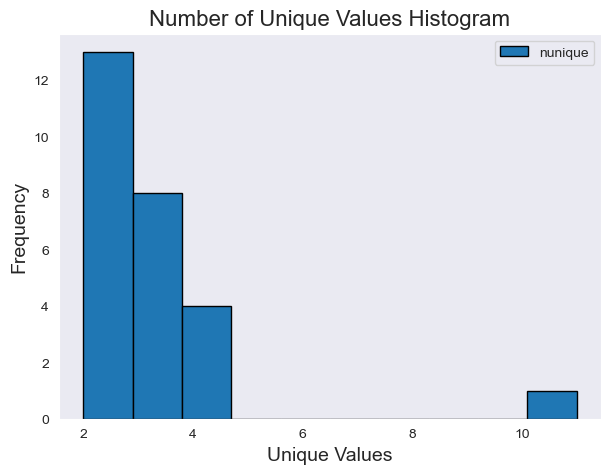

In [16]:
fs.plot_unique()

In [17]:
fs.unique_stats.sample(10)

,nunique
Gypsum,11
Silica fume,3
Slag,2
Sea limestone,2
Recycled demolition sand,2
Carbonated ash,2
Rice husk ash,2
Coarse silica arid,4
Fireproof cardboard,2
Coal Fly Ash,3


Collinear analysis

In [18]:
fs.identify_collinear(correlation_threshold=0.9, one_hot = True)

3 features with a correlation magnitude greater than 0.90.



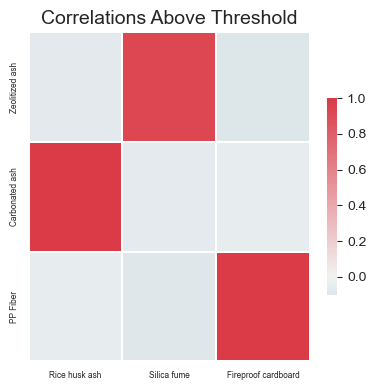

In [19]:
fs.plot_collinear()

plt.gcf().set_size_inches(4, 4)  
plt.xticks(fontsize=6)          
plt.yticks(fontsize=6)          
plt.tight_layout()              
plt.show()

In [20]:
correlated_features = fs.ops['collinear']

In [21]:
correlated_features

['Fireproof cardboard', 'Rice husk ash', 'Silica fume']

In [22]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,Fireproof cardboard,PP Fiber,1.000000
1,Rice husk ash,Carbonated ash,1.000000
2,Silica fume,Zeolitized ash,0.919704


In [23]:
#fs.identify_zero_importance(task = 'regression', eval_metric = 'l2',
#                            n_iterations = 100, early_stopping = True)

In [24]:
#fs.plot_feature_importances(threshold = 0.99, plot_n = 20)

In [25]:
#df_fs = fs.remove(methods = ['collinear'], keep_one_hot = True)

In [23]:
df_fs.shape

(30, 26)

In [24]:
df_fs.head()

,Thickness,Gypsum,Lomas ash,Vermiculite,Fiberglass,PP Fiber,Fireproof cardboard,Carbonated ash,Rice husk ash,GSA ash,...,Coarse silica arid,Recycled demolition sand,Coarse demolition recycled arid,Coal slag,Bagasse ash,Coal Fly Ash,Silica gravel,Slag,Zeolitized ash,Silica fume
0,2.0,100.0,0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,2.0,30.0,60,9.5,0.5,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,1.5,99.5,0,0.0,0.0,0.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,1.5,30.0,60,9.5,0.5,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,1.3,99.5,0,0.0,0.0,0.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [25]:
feat_selector = FeatureSelector(modeling_type='regression',
                                X_train=df_fs,
                                y_train=df_target,
                                X_test=None,
                                y_test=None,
                                numeric_columns=num_feat,
                                categorical_columns=bin_feat,
                                seed=24)

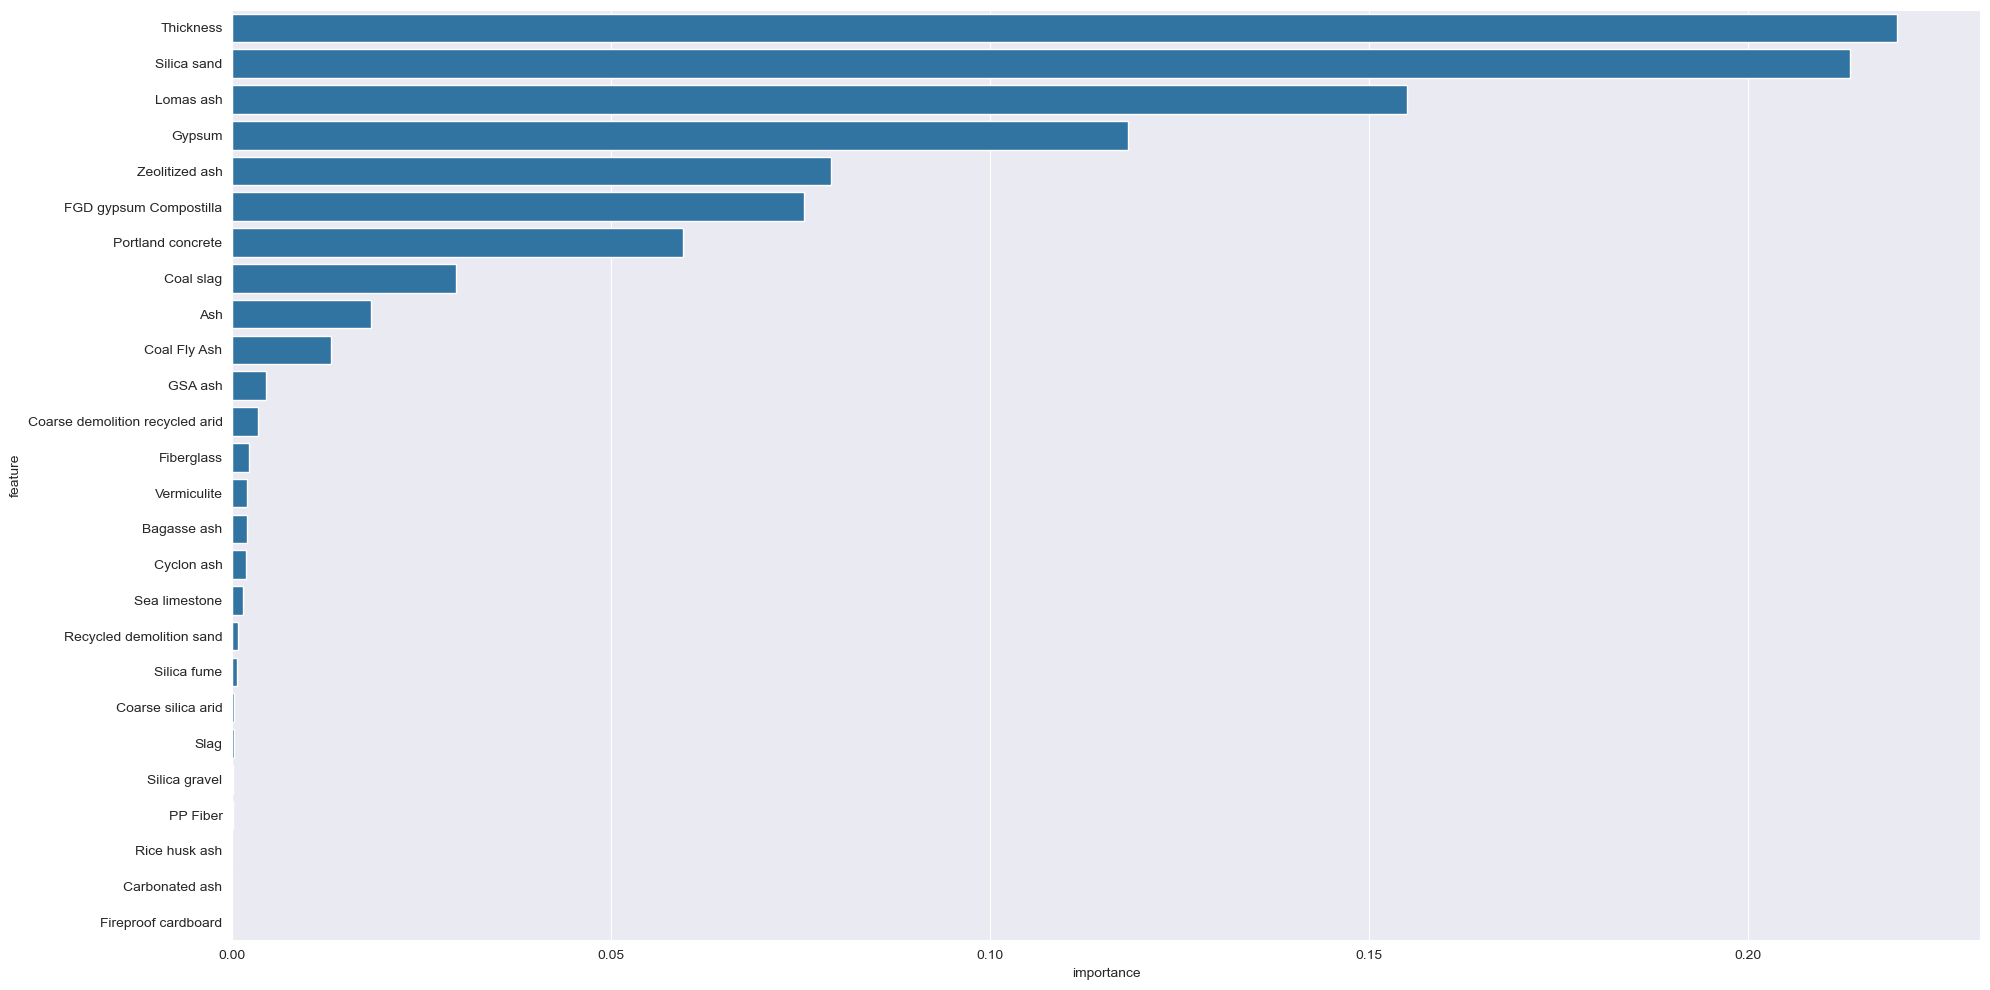

In [26]:
#Train XGB model & return importance results as pd.DataFrame 
xgb_importance_df = feat_selector.xgb_importance(hyperparam_dict=None,
                                                   objective=None,
                                                   return_plot=True)


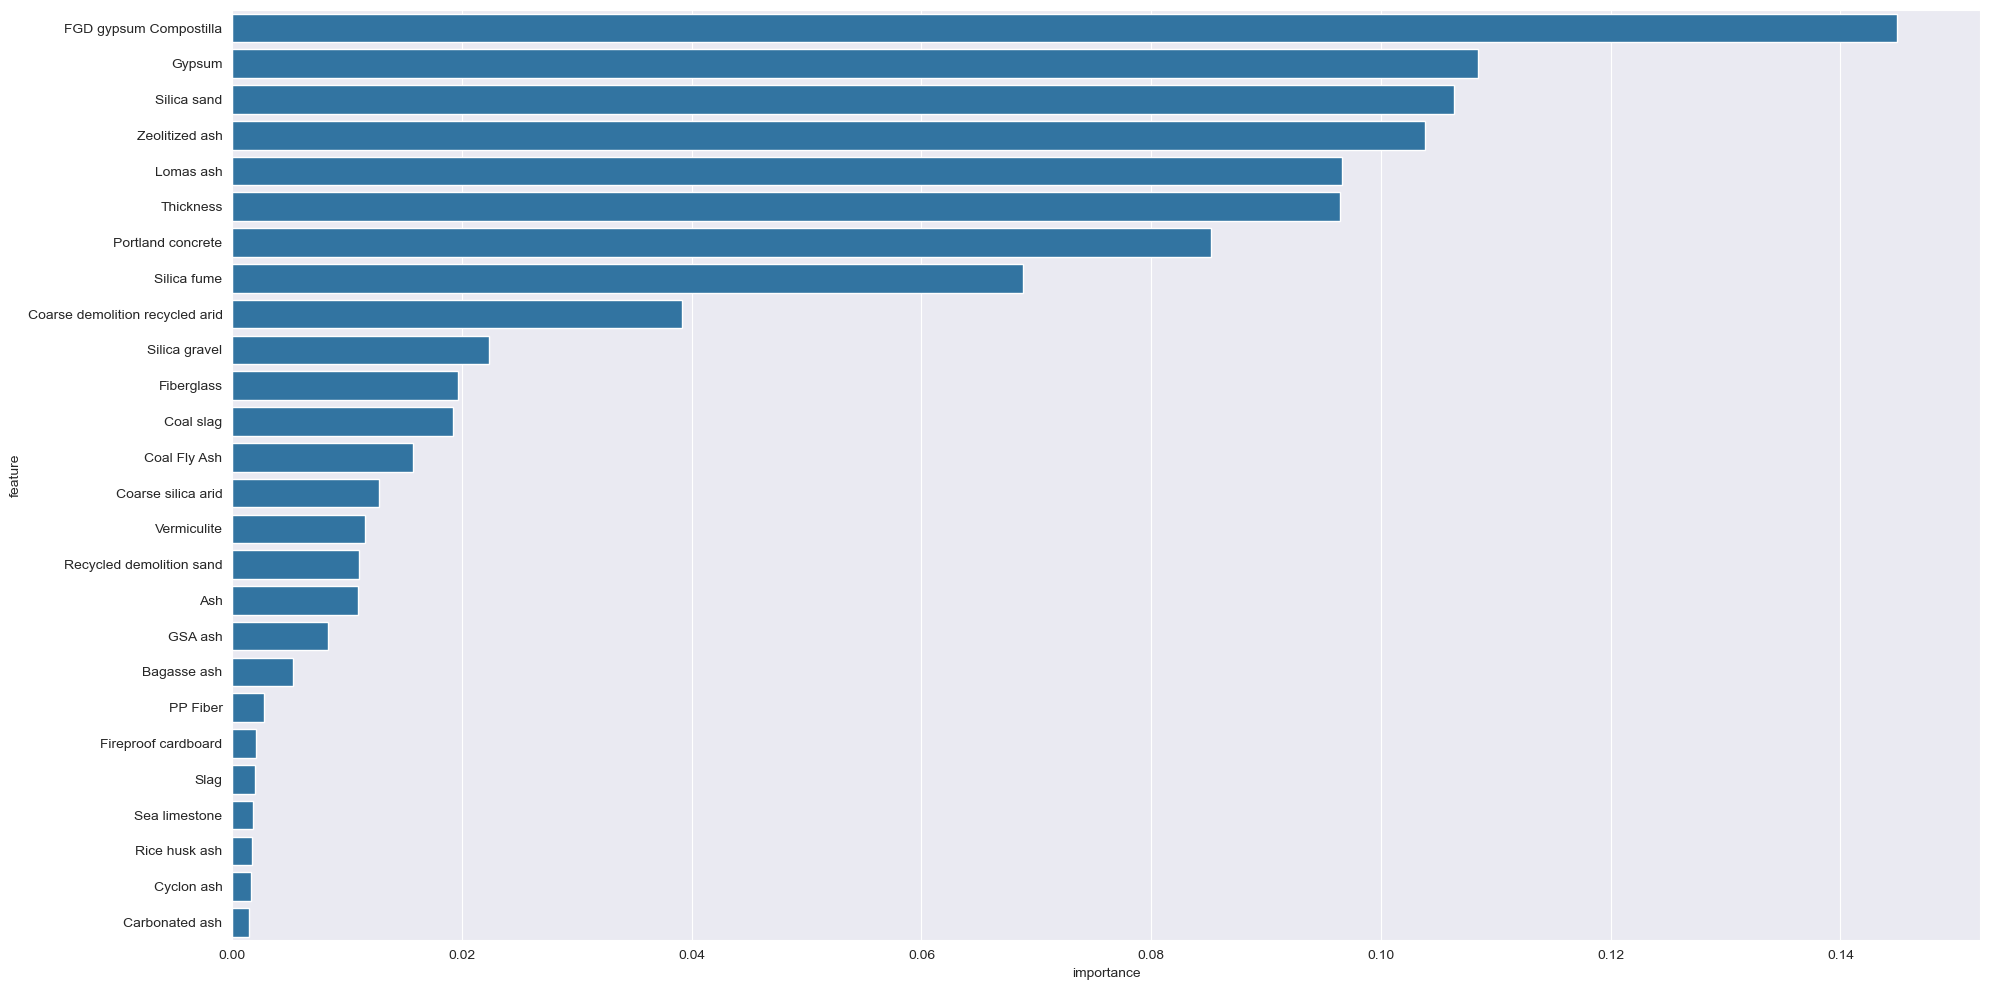

In [27]:
#Train RFR model & return importance results as pd.DataFrame 
rf_importance_df = feat_selector.rf_importance(hyperparam_dict=None,
                                                   return_plot=True)


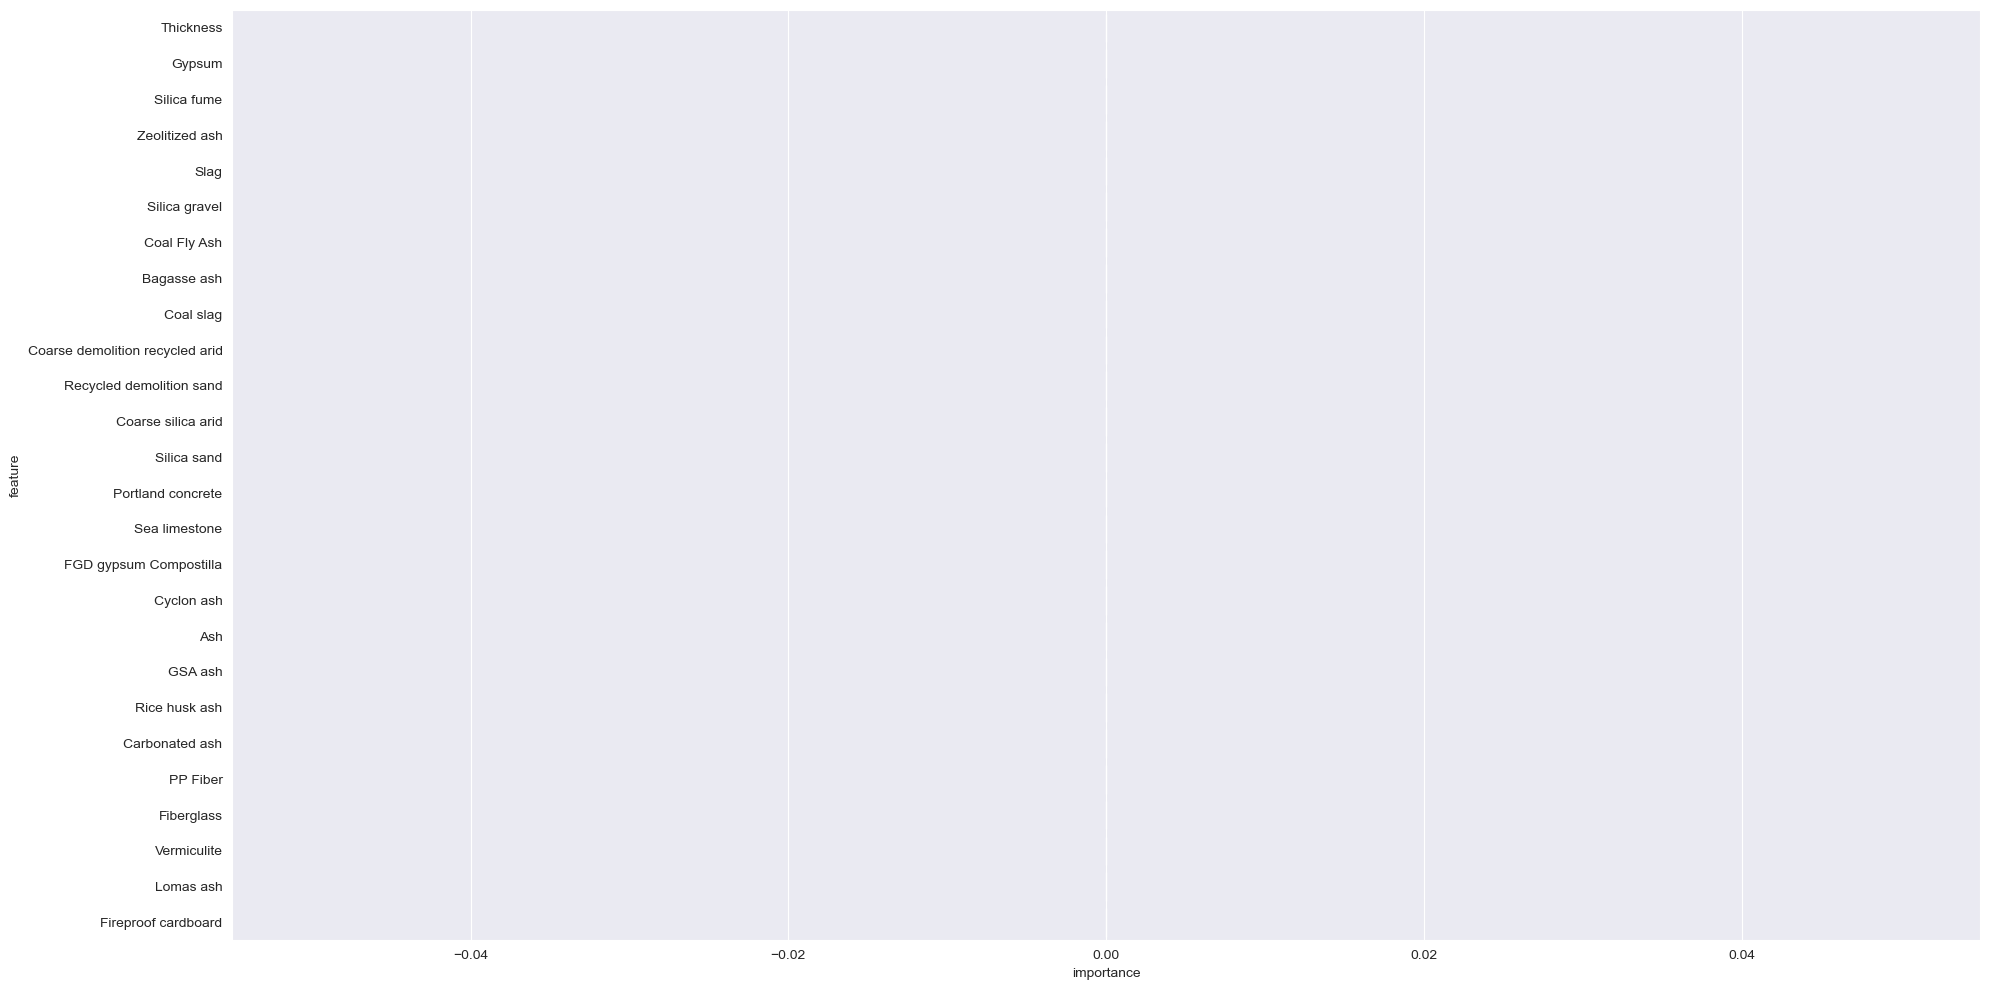

In [28]:
#Train LightGBM model & return importance results as pd.DataFrame 
lgbm_importance_df = feat_selector.lgbm_importance(hyperparam_dict=None,
                                                   objective=None,
                                                   return_plot=True)


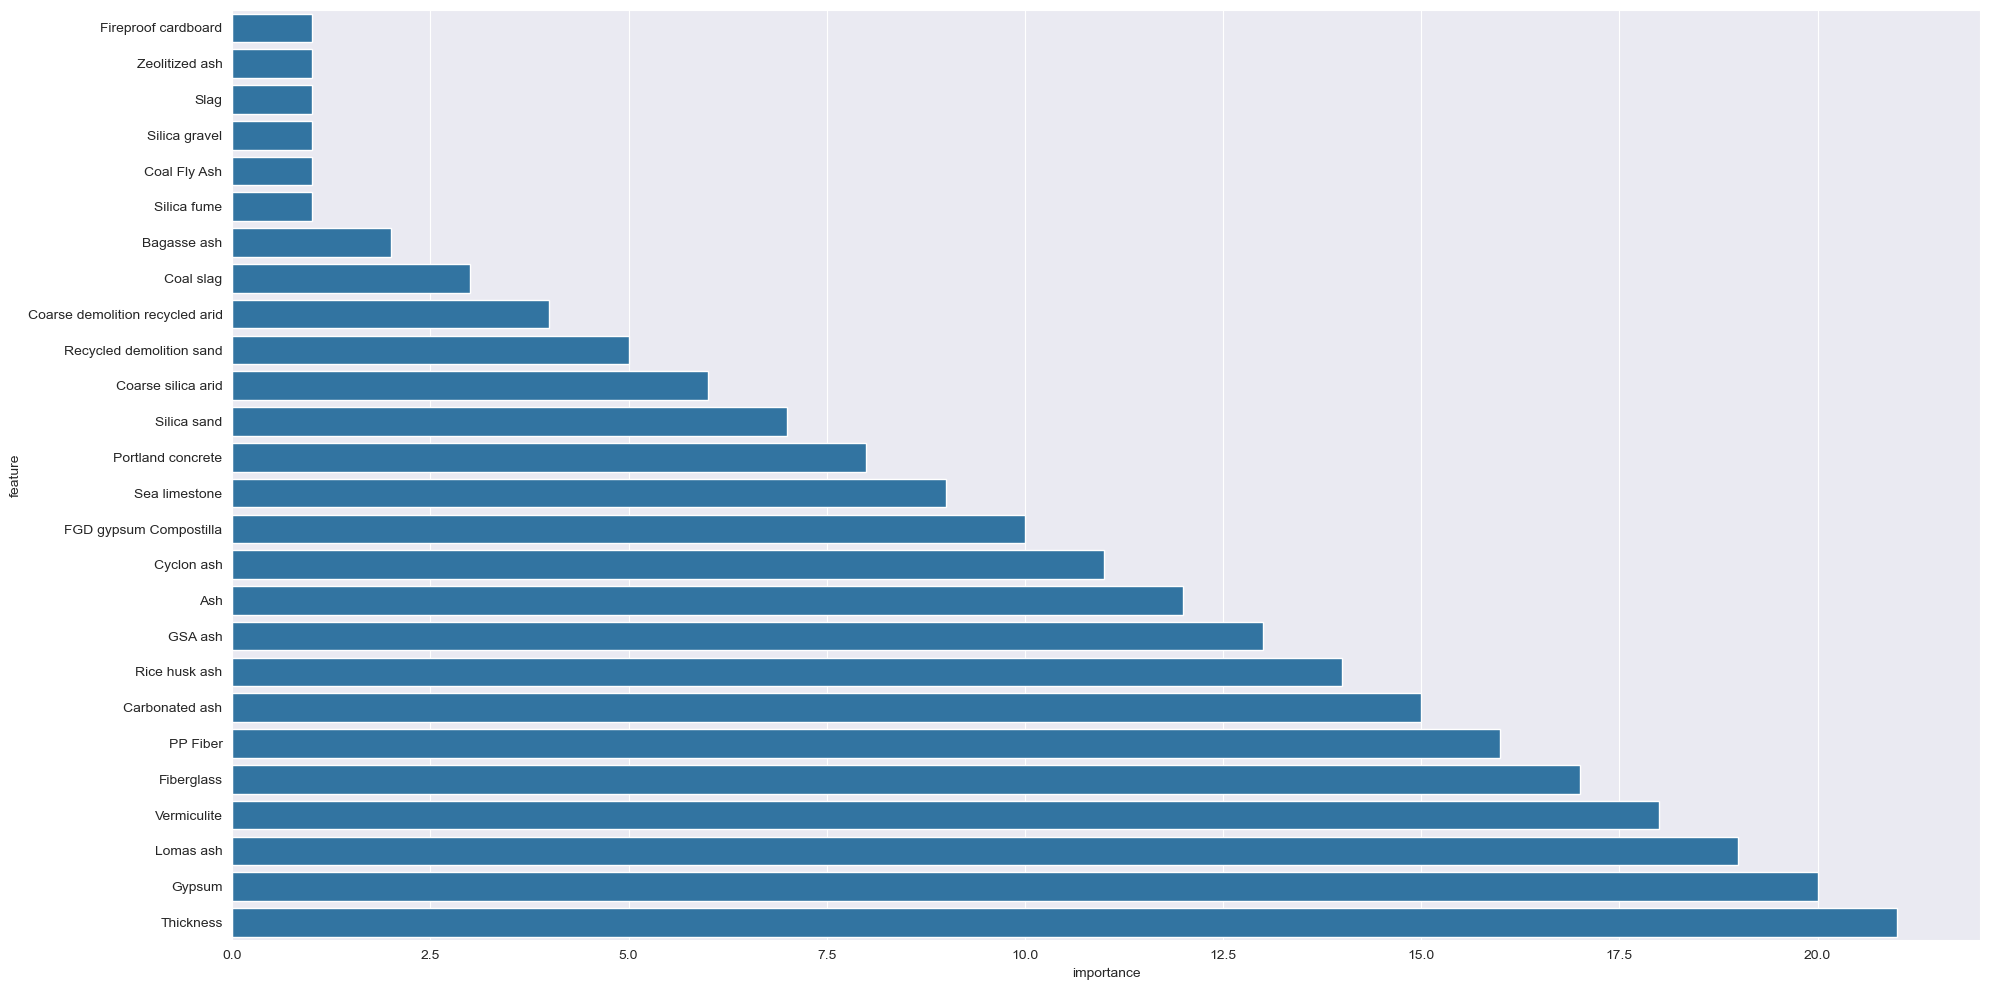

In [29]:
#Apply RFECV with using LightGBM as the estimator & return importance results as pd.DataFrame 
lgbm_hyperparams = {'learning_rate': 0.001, 'max_depth': 6, 'n_estimators': 400,
                    'num_leaves': 30, 'random_state':24, 'importance_type':'gain'
                   }

rfecv_hyperparams = {'step':1, 'min_features_to_select':6, 'cv':10}

rfecv_importance_df = feat_selector.rfecv_importance(lgbm_hyperparams=lgbm_hyperparams,
                                                     rfecv_hyperparams=rfecv_hyperparams,
                                                     return_plot=True)

In [30]:
#Automated correlation analysis & applying multiple feature selection methods
feat_selector = AutoFeatureSelect(modeling_type='regression',
                                X_train=df_fs,
                                y_train=df_target,
                                X_test=None,
                                y_test=None,
                                numeric_columns=num_feat,
                                categorical_columns=bin_feat,
                                seed=24)

final_importance_df = feat_selector.apply_feature_selection(selection_methods=['xgb', 'lgbm', 'rfecv', 'boruta'])

LightGBM Feature Importance is finished
XGBoost Feature Importance is finished
RFECV Feature Importance is finished
Boruta Feature Importance is finished


In [31]:
final_importance_df.sort_values(by = 'xgb_importance', ascending = False)

,feature,lgbm_importance,xgb_importance,rfecv_rankings,boruta_support,boruta_support_weak,boruta_ranking
0,Thickness,0.0,0.219631,26,0,0,6
12,Silica sand,0.0,0.213433,12,0,1,2
24,Lomas ash,0.0,0.154943,24,0,0,6
1,Gypsum,0.0,0.118134,25,0,0,3
3,Zeolitized ash,0.0,0.079062,3,0,0,3
15,FGD gypsum Compostilla,0.0,0.075487,15,0,0,3
13,Portland concrete,0.0,0.059438,13,0,0,6
8,Coal slag,0.0,0.029484,8,0,0,10
17,Ash,0.0,0.018293,17,0,0,17
6,Coal Fly Ash,0.0,0.013029,6,0,0,15


In [32]:
corr_features = feat_selector.calculate_correlated_features(static_features=None,
                                                            num_threshold=0.9,
                                                            cat_threshold=0.9)


In [33]:
corr_features

['Carbonated ash', 'Zeolitized ash']

In [38]:
feat_selector.drop_correlated_features()

In [35]:
def get_feature_lists_by_threshold(df, threshold=0.99):
    accumulated_sum = 0
    include = []
    exclude = []
    
    for index, row in df.iterrows():
        if accumulated_sum + row['xgb_importance'] <= threshold:
            include.append(row['feature'])
            accumulated_sum += row['xgb_importance']
        else:
            exclude.append(row['feature'])
            exclude.extend(df['feature'][index + 1:])
            break
    
    return include, exclude

In [36]:
threshold = 0.95

include, exclude = get_feature_lists_by_threshold(final_importance_df, threshold)

print("Include:", include)
print("Exclude:", exclude)

Include: ['Thickness', 'Gypsum', 'Silica fume', 'Zeolitized ash', 'Slag', 'Silica gravel', 'Coal Fly Ash', 'Bagasse ash', 'Coal slag', 'Coarse demolition recycled arid', 'Recycled demolition sand', 'Coarse silica arid', 'Silica sand', 'Portland concrete', 'Sea limestone', 'FGD gypsum Compostilla', 'Cyclon ash', 'Ash', 'GSA ash', 'Rice husk ash', 'Carbonated ash', 'PP Fiber', 'Fiberglass', 'Vermiculite']
Exclude: ['Lomas ash', 'Fireproof cardboard']


In [38]:
drop = []

In [39]:
exclude = list(set(exclude + drop))

In [40]:
df = df.drop(columns = exclude)

In [41]:
df.head()

,Thickness,t180,Gypsum,Vermiculite,Fiberglass,PP Fiber,Carbonated ash,Rice husk ash,GSA ash,Ash,...,Coarse silica arid,Recycled demolition sand,Coarse demolition recycled arid,Coal slag,Bagasse ash,Coal Fly Ash,Silica gravel,Slag,Zeolitized ash,Silica fume
0,2.0,35.0,100.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,2.0,15.7,30.0,9.5,0.5,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,1.5,26.0,99.5,0.0,0.0,0.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,1.5,15.7,30.0,9.5,0.5,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,1.3,20.2,99.5,0.0,0.0,0.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [42]:
df.to_excel(path + 'FR_FS.xlsx', index=False)